<a href="https://colab.research.google.com/github/NeuroLife77/BIOL309_final_project/blob/main/plots_309.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive/')
import sys
sys.path.append('/content/gdrive/My Drive/ColabNotebooks/biol_309')
# Global variables to keep track of things 
# Also allows easy interface and automated adaptive plots for non-coders in the group
parameter_indices = { "cee":0,"cei":1,"cie":2,"cii":3,"taue":4,"taui":5,"cm":6,"taum":7,"E_max":8}
latex = {"cee":"$c_{ee}$", "cei":"$c_{ei}$", "cie":"$c_{ie}$","cii":"$c_{ii}$","taue":"$\\tau_{e}$", "taui":"$\\tau_{i}$","cm":"$c_{m}$","taum":"$\\tau_{m}$", "E_max":"$E_{max}$",}

# Interface to obtain the time series from the dictionary of parameter values
def get_simulation(parameter_dict, initial_cond = [0.5,0.5,0.5], **kwargs):
  M_parameters = np.array([
    parameter_dict[item] for item in parameter_dict
  ])
  ts = simulate_heun(fn,np.array(initial_cond),M_parameters, **kwargs)
  return ts

parameter_range_dict = {
    "cee":[11, 16],
    "cei":[5, 15],
    "cie":[8, 12],
    "cii":[5, 10],
    "taue":[1, 50],
    "taui":[1, 50],
}
from pickle import dump, load
def save_log(log, directory, file_name, enforce_replace = False):
    try:
        with open(f'{directory}/{file_name}.pkl', 'rb') as f:
            _ = load(f)
        if not enforce_replace:
            print("This file already exists, please select 'enforce_replace = True' to rewrite it.")
            return
    except:
        pass
    with open(f'{directory}{file_name}.pkl', 'wb') as f:
        dump(log, f)

def get_log(directory, file_name):
    if directory is None and 'drffit_object' in file_name:
        return None
    try:
        with open(f'{directory}{file_name}.pkl', 'rb') as f:
            log = load(f)
        return log
    except:
        print(f"File '{directory}{file_name}.pkl' does not exist.")
        return None

Mounted at /content/gdrive/


In [ ]:
parameter_dict = {
    "cee":16,    # [11, 16]
    "cei":15,    # [2, 22]
    "cie":12,    # [2, 15]
    "cii":3,     # [2, 15]
    "taue":8,    # [1, 50]
    "taui":25,   # [1, 50]
    "cm":1.0,    # [0, 1] fixed don't change (will be automatically changed)
    "taum":100,  # fixed don't change
    "E_max":0.5  # [0, 1] fixed don't change (not used in the tests here)
}
bif_param = "cee"
bifurcation_settings = [
      {
        "bifurcation_parameter": bif_param,
        "bifurcation_range":parameter_range_dict[bif_param],  # [min_val, max_val]
        "bifurcation_resolution":500     # Note: A resolution of 250 takes ~1min 5sec to run
      },
      {
        "bifurcation_parameter":"cm",
        "bifurcation_range":[0, 1.0],  # [min_val, max_val]
        "bifurcation_resolution":100   # Note: A resolution of 250 takes ~1min 5sec to run
      }
  ]
bifurcation_dict = get_log('/content/gdrive/MyDrive/Colab Notebooks/biol_309/',f'bifurcation2D_{bif_param}')
bifurcation_E, bifurcation_I, bifurcation_M, parameter_range, frequency, IC_list = bifurcation_dict["bifurcation_E"],bifurcation_dict["bifurcation_I"],bifurcation_dict["bifurcation_M"],bifurcation_dict["parameter_range"],bifurcation_dict["frequency"],bifurcation_dict["IC_list"]
initial_cond_list = []
for IC in IC_list:
  initial_cond_list.append([f"$E_0={round(IC[0],2)}$", f"$I_0={round(IC[1],2)}$", f"$M_0={round(IC[2],2)}$"])

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


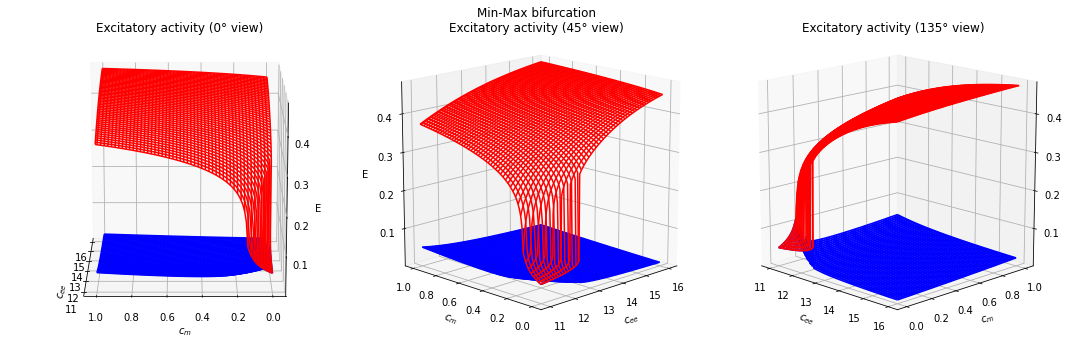

In [ ]:
bif_inX, bif_inY = np.meshgrid(parameter_range[0],parameter_range[1])
from mpl_toolkits import mplot3d
par_latex0 = latex[bifurcation_settings[0]["bifurcation_parameter"]]
par_latex1 = latex[bifurcation_settings[1]["bifurcation_parameter"]]
num_angles = 3
fig = plt.figure(figsize=(15,5))
angle_axes = [[None,None,None] for _ in range(num_angles)]
list_angle_vals = [0,45,135]
ic_num = 1
colors = ["b","r"]
counter = 1
for angle in range(num_angles):
  angle_axes[angle][0] = plt.subplot(1,num_angles,counter,projection='3d')
  counter+=1
  for i in range(2*ic_num,2*(ic_num+1)):
      angle_axes[angle][0].plot_wireframe(bif_inX, bif_inY, bifurcation_E[:,:,i], color = colors[(i%2)])
  angle_axes[angle][0].set_xlabel(f'{par_latex0}')
  angle_axes[angle][0].set_ylabel(f'{par_latex1}')
  angle_axes[angle][0].set_zlabel('E');
  angle_axes[angle][0].view_init(elev=15., azim=180+list_angle_vals[angle])
  plt.title(f"Excitatory activity ({list_angle_vals[angle]}° view)")
plt.suptitle("Min-Max bifurcation")
plt.tight_layout()
plt.show()

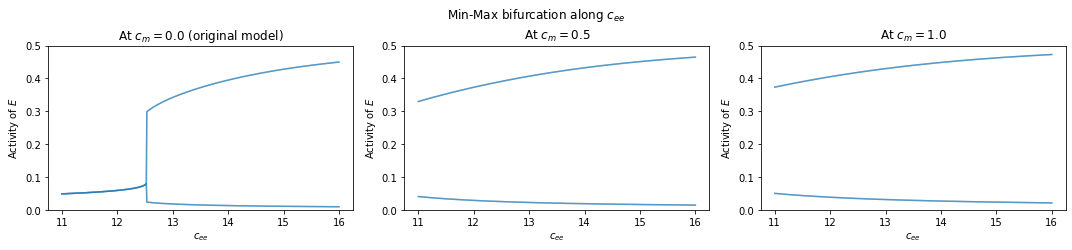

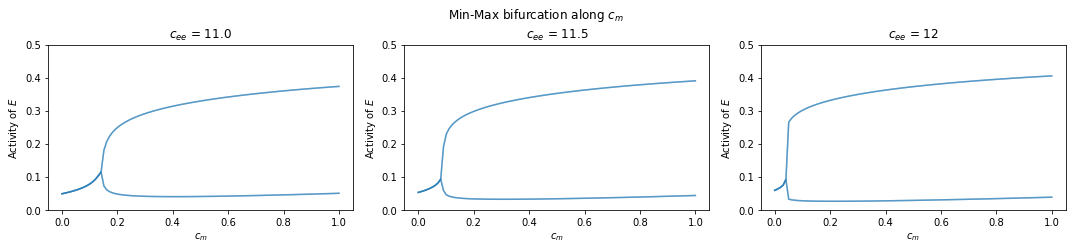

In [ ]:
# Run this cell after the one above to plot the bifurcations
values_to_slice_at = [11.0,11.5,12]

par_latex = latex[bifurcation_settings[0]["bifurcation_parameter"]]
par_range = parameter_range[0].reshape((-1,1))
par_range0 = parameter_range[0].reshape((-1,1))
par_range1 = parameter_range[1].reshape((-1,1))
fig = plt.figure(figsize=(15,3.5))

# First plot
ax = plt.subplot(1,3,1)
ax.plot(par_range, bifurcation_E[0], 'C0', alpha=.5)
plt.title("At $c_m=0.0$ (original model)")
plt.xlabel(f"{par_latex}")
plt.ylabel("Activity of $E$")
plt.ylim([0,0.5])
ax = plt.subplot(1,3,2)
ax.plot(par_range, bifurcation_E[len(bifurcation_E)//2], 'C0', alpha=.5)
plt.title("At $c_m=0.5$")
plt.xlabel(f"{par_latex}")
plt.ylabel("Activity of $E$")
plt.ylim([0,0.5])
ax = plt.subplot(1,3,3)
ax.plot(par_range, bifurcation_E[-1], 'C0', alpha=.5)
plt.title("At $c_m=1.0$")
plt.xlabel(f"{par_latex}")
plt.ylabel("Activity of $E$")
plt.ylim([0,0.5])
plt.suptitle(f"Min-Max bifurcation along {par_latex0}")
plt.tight_layout(rect=[0, 0.00, 1, 0.94])
plt.show()

# Second plot
par2_val_indices = [int((val-bifurcation_settings[0]["bifurcation_range"][0])/(bifurcation_settings[0]["bifurcation_range"][1]-bifurcation_settings[0]["bifurcation_range"][0]) * bifurcation_settings[0]["bifurcation_resolution"]) for val in values_to_slice_at] 
fig = plt.figure(figsize=(15,3.5))
for ct,par2_val_index in enumerate(par2_val_indices):
  ax = plt.subplot(1,len(par2_val_indices),1+ct)
  ax.plot(par_range1, bifurcation_E[:,par2_val_index], 'C0', alpha=.5)
  plt.title(f"{par_latex0} = {values_to_slice_at[ct]}")
  plt.xlabel(f"{par_latex1}")
  plt.ylabel("Activity of $E$")
  plt.ylim([0,0.5])
plt.suptitle(f"Min-Max bifurcation along {par_latex1}")
plt.tight_layout(rect=[0, 0.00, 1, 0.94])
plt.show()

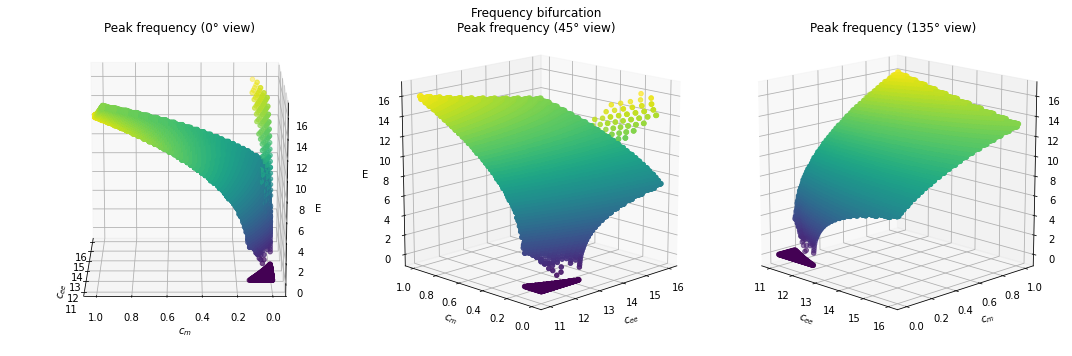

In [ ]:
bif_inX, bif_inY = np.meshgrid(parameter_range[0],parameter_range[1])
from mpl_toolkits import mplot3d
par_latex0 = latex[bifurcation_settings[0]["bifurcation_parameter"]]
par_latex1 = latex[bifurcation_settings[1]["bifurcation_parameter"]]
num_angles = 3
fig = plt.figure(figsize=(15,5))
angle_axes = [[None,None,None] for _ in range(num_angles)]
list_angle_vals = [0,45,135]
ic_num = 1
colors = ["b","r"]
counter = 1
for angle in range(num_angles):
  angle_axes[angle][0] = plt.subplot(1,num_angles,counter,projection='3d')
  counter+=1
  angle_axes[angle][0].scatter(bif_inX, bif_inY, frequency[:,:,ic_num,0].argmax(-1)/4, c=frequency[:,:,ic_num,0].argmax(-1)/4, cmap='viridis')
  angle_axes[angle][0].set_xlabel(f'{par_latex0}')
  angle_axes[angle][0].set_ylabel(f'{par_latex1}')
  angle_axes[angle][0].set_zlabel('E');
  angle_axes[angle][0].view_init(elev=15., azim=180+list_angle_vals[angle])
  plt.title(f"Peak frequency ({list_angle_vals[angle]}° view)")
plt.suptitle("Frequency bifurcation")
plt.tight_layout()
plt.show()

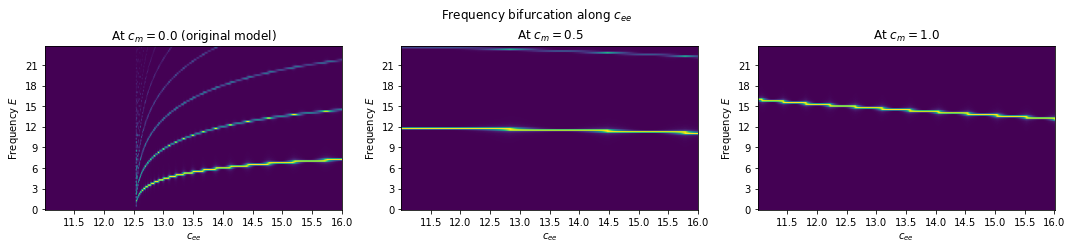

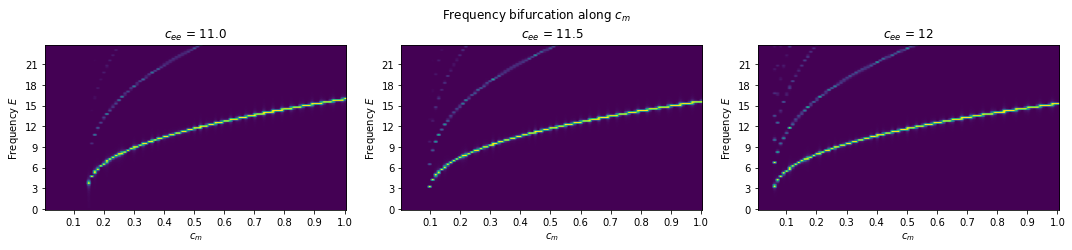

In [ ]:
# Run this cell after the one above to plot the bifurcations
#values_to_slice_at = [11,11.5,12.0]

max_plot_freq = 24
par2_val_list = [1,2,-1] 
title = ["$E$","$I$","$M$"]
initial_cond=0
npoints = bifurcation_settings[0]["bifurcation_resolution"]
step_freq = max_plot_freq//8
par_latex = latex[bifurcation_settings[0]["bifurcation_parameter"]]
par_range = parameter_range[0].reshape((-1,1))
par_range0 = parameter_range[0].reshape((-1,1))
par_range1 = parameter_range[1].reshape((-1,1))
fig = plt.figure(figsize=(15,3.5))

# First plot
ax = plt.subplot(1,3,1)
plt.imshow(frequency[0,:,initial_cond,0,:max_plot_freq*4].T, aspect = "auto")
ax.invert_yaxis()
ax.set_yticks([(4*step_freq)*i for i in range(8)])
ax.set_yticklabels([f'{str(round(step_freq*i,0))}' for i in range(8)])
ax.set_xticks([i for i in range(npoints//10-1,par_range.shape[0],npoints//10)])
ax.set_xticklabels([f'{str(round(par_range[i].item(),1))}' for i in range(npoints//10-1,par_range.shape[0],npoints//10)])
plt.title("At $c_m=0.0$ (original model)")
plt.xlabel(f"{par_latex}")
plt.ylabel("Frequency $E$")
ax = plt.subplot(1,3,2)
plt.imshow(frequency[len(bifurcation_E)//2,:,initial_cond,0,:max_plot_freq*4].T, aspect = "auto")
ax.invert_yaxis()
ax.set_yticks([(4*step_freq)*i for i in range(8)])
ax.set_yticklabels([f'{str(round(step_freq*i,0))}' for i in range(8)])
ax.set_xticks([i for i in range(npoints//10-1,par_range.shape[0],npoints//10)])
ax.set_xticklabels([f'{str(round(par_range[i].item(),1))}' for i in range(npoints//10-1,par_range.shape[0],npoints//10)])
plt.title("At $c_m=0.5$")
plt.xlabel(f"{par_latex}")
plt.ylabel("Frequency $E$")
ax = plt.subplot(1,3,3)
plt.imshow(frequency[-1,:,initial_cond,0,:max_plot_freq*4].T, aspect = "auto")
ax.invert_yaxis()
ax.set_yticks([(4*step_freq)*i for i in range(8)])
ax.set_yticklabels([f'{str(round(step_freq*i,0))}' for i in range(8)])
ax.set_xticks([i for i in range(npoints//10-1,par_range.shape[0],npoints//10)])
ax.set_xticklabels([f'{str(round(par_range[i].item(),1))}' for i in range(npoints//10-1,par_range.shape[0],npoints//10)])
plt.title("At $c_m=1.0$")
plt.xlabel(f"{par_latex}")
plt.ylabel("Frequency $E$")
plt.suptitle(f"Frequency bifurcation along {par_latex0}")
plt.tight_layout(rect=[0, 0.00, 1, 0.94])
plt.show()

# Second plot
npoints = bifurcation_settings[1]["bifurcation_resolution"]
par2_val_indices = [int((val-bifurcation_settings[0]["bifurcation_range"][0])/(bifurcation_settings[0]["bifurcation_range"][1]-bifurcation_settings[0]["bifurcation_range"][0]) * bifurcation_settings[0]["bifurcation_resolution"]) for val in values_to_slice_at] 
fig = plt.figure(figsize=(15,3.5))
for ct,par2_val_index in enumerate(par2_val_indices):
  ax = plt.subplot(1,len(par2_val_indices),1+ct)
  plt.imshow(frequency[:,par2_val_index,initial_cond,0,:max_plot_freq*4].T, aspect = "auto")
  ax.invert_yaxis()
  ax.set_yticks([(4*step_freq)*i for i in range(8)])
  ax.set_yticklabels([f'{str(round(step_freq*i,0))}' for i in range(8)])
  ax.set_xticks([i for i in range(npoints//10-1,par_range1.shape[0],npoints//10)])
  ax.set_xticklabels([f'{str(round(par_range1[i].item(),1))}' for i in range(npoints//10-1,par_range1.shape[0],npoints//10)])

  plt.title(f"{par_latex0} = {values_to_slice_at[ct]}")
  plt.xlabel(f"{par_latex1}")
  plt.ylabel("Frequency $E$")
plt.suptitle(f"Frequency bifurcation along {par_latex1}")
plt.tight_layout(rect=[0, 0.00, 1, 0.94])
plt.show()

In [ ]:
# Run this cell after the one above to plot the bifurcations
values_to_slice_at = [11,11.5,12.0]

par_latex = latex[bifurcation_settings[0]["bifurcation_parameter"]]
par_range = parameter_range[0].reshape((-1,1))
par_range0 = parameter_range[0].reshape((-1,1))
par_range1 = parameter_range[1].reshape((-1,1))
fig = plt.figure(figsize=(15,3.5))

# First plot
ax = plt.subplot(1,3,1)
ax.plot(par_range, frequency[0,:,:,0].argmax(-1)/4, 'C0', alpha=.5)
plt.title("At $c_m=0.0$ (original model)")
plt.xlabel(f"{par_latex}")
plt.ylabel("Peak frequency $E$")
plt.ylim([0,20])
ax = plt.subplot(1,3,2)
ax.plot(par_range, frequency[len(bifurcation_E)//2,:,:,0].argmax(-1)/4, 'C0', alpha=.5)
plt.title("At $c_m=0.5$")
plt.xlabel(f"{par_latex}")
plt.ylabel("Peak frequency $E$")
plt.ylim([0,20])
ax = plt.subplot(1,3,3)
ax.plot(par_range,frequency[-1,:,:,0].argmax(-1)/4, 'C0', alpha=.5)
plt.title("At $c_m=1.0$")
plt.xlabel(f"{par_latex}")
plt.ylabel("Peak frequency $E$")
plt.ylim([0,20])
plt.suptitle(f"Frequency bifurcation along {par_latex0}")
plt.tight_layout(rect=[0, 0.00, 1, 0.94])
plt.show()

# Second plot
par2_val_indices = [int((val-bifurcation_settings[0]["bifurcation_range"][0])/(bifurcation_settings[0]["bifurcation_range"][1]-bifurcation_settings[0]["bifurcation_range"][0]) * bifurcation_settings[0]["bifurcation_resolution"]) for val in values_to_slice_at] 
fig = plt.figure(figsize=(15,3.5))
for ct,par2_val_index in enumerate(par2_val_indices):
  ax = plt.subplot(1,len(par2_val_indices),1+ct)
  ax.plot(par_range1, frequency[:,par2_val_index,:,0].argmax(-1)/4, 'C0', alpha=.5)
  plt.title(f"{par_latex0} = {values_to_slice_at[ct]}")
  plt.xlabel(f"{par_latex1}")
  plt.ylabel("Peak frequency $E$")
  plt.ylim([0,20])
plt.suptitle(f"Frequency bifurcation along {par_latex1}")
plt.tight_layout(rect=[0, 0.00, 1, 0.94])
plt.show()